In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
festivales_bcn_21 = pd.read_pickle("./data/festivales_bcn_21_procesado.pkl")

In [69]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "Mes",
    "Estacion"
]

In [70]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion'
]

In [71]:
columnas_numericas_fests = [
    "Edicio",
    "Assistents_a_Barcelona",
    "Assistents_fora_de_Barcelona",
    "total_asist"
]

Funciones análisis

In [72]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [73]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [74]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [75]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [76]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [77]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [78]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [79]:
festivales_bcn_21.describe().loc["mean"]

Edicio                             19.285714
Assistents_a_Barcelona          75648.000000
Assistents_fora_de_Barcelona        0.000000
total_asist                     75648.000000
Name: mean, dtype: float64

In [80]:
festivales_bcn_21.describe().loc["50%"]

Edicio                             10.0
Assistents_a_Barcelona          52568.0
Assistents_fora_de_Barcelona        0.0
total_asist                     52568.0
Name: 50%, dtype: float64

In [81]:
festivales_bcn_21.describe().loc["max"]

Edicio                              53.0
Assistents_a_Barcelona          221000.0
Assistents_fora_de_Barcelona         0.0
total_asist                     221000.0
Name: max, dtype: float64

In [82]:
festivales_bcn_21.describe().loc["min"]

Edicio                          2.0
Assistents_a_Barcelona          0.0
Assistents_fora_de_Barcelona    0.0
total_asist                     0.0
Name: min, dtype: float64

In [83]:
festivales_bcn_21[categoricas_festivales].mode().T

,0,1
Ambit,Música,NaN
Titularidad,Pública,NaN
Mes,Junio,Noviembre
Estacion,Otoño,NaN


Comentarios <br>


Frecuencias relativa y absoluta

In [84]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts())
    print("\n")

Ambit
Música                         3
Multidisciplinaris i altres    2
Arts escèniques                2
Name: count, dtype: int64


Titularidad
Pública    4
Privada    3
Name: count, dtype: int64


Mes
Noviembre     2
Junio         2
Diciembre     1
Septiembre    1
Enero         1
Name: count, dtype: int64


Estacion
Otoño        4
Primavera    1
Verano       1
Invierno     1
Name: count, dtype: int64




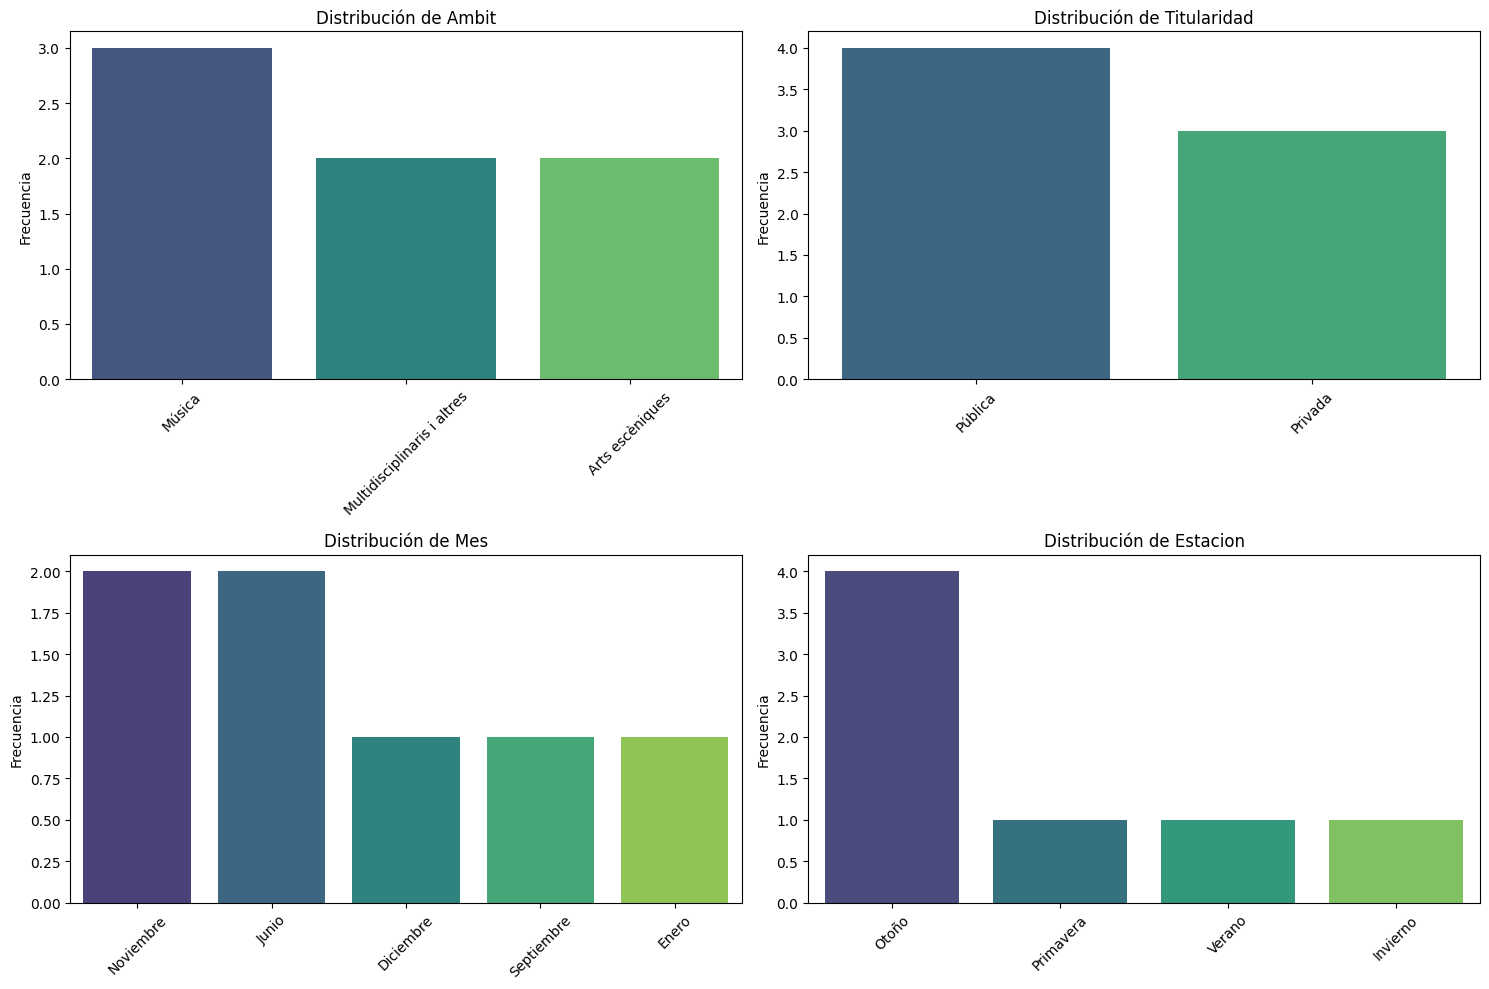

In [85]:
pinta_distribucion_categoricas(festivales_bcn_21, categoricas_destacadas)

Comentarios <br>


In [86]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts()/len(festivales_bcn_21)*100)
    print("\n")

Ambit
Música                         42.857143
Multidisciplinaris i altres    28.571429
Arts escèniques                28.571429
Name: count, dtype: float64


Titularidad
Pública    57.142857
Privada    42.857143
Name: count, dtype: float64


Mes
Noviembre     28.571429
Junio         28.571429
Diciembre     14.285714
Septiembre    14.285714
Enero         14.285714
Name: count, dtype: float64


Estacion
Otoño        57.142857
Primavera    14.285714
Verano       14.285714
Invierno     14.285714
Name: count, dtype: float64




Comentarios <br>


Medidas de posición

In [87]:
festivales_bcn_21.describe()

,Edicio,Assistents_a_Barcelona,Assistents_fora_de_Barcelona,total_asist
count,7.000000,7.000000,7.0,7.000000
mean,19.285714,75648.000000,0.0,75648.000000
std,20.718062,77169.256193,0.0,77169.256193
min,2.000000,0.000000,0.0,0.000000
25%,6.500000,20372.000000,0.0,20372.000000
50%,10.000000,52568.000000,0.0,52568.000000
75%,28.500000,107612.000000,0.0,107612.000000
max,53.000000,221000.000000,0.0,221000.000000


In [88]:
get_IQR(festivales_bcn_21,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

22.0

In [89]:
print(festivales_bcn_21["Edicio"].quantile(0.5), "\n",
    festivales_bcn_21["Edicio"].quantile(0.9), "\n",
    festivales_bcn_21["Edicio"].quantile(0.95), "\n",
    festivales_bcn_21["Edicio"].max())

10.0 
 48.2 
 50.599999999999994 
 53.0


Comentarios <br>


In [90]:
get_IQR(festivales_bcn_21,"total_asist") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

87240.0

In [91]:
print(festivales_bcn_21["total_asist"].quantile(0.5), "\n",
    festivales_bcn_21["total_asist"].quantile(0.9), "\n",
    festivales_bcn_21["total_asist"].quantile(0.95), "\n",
    festivales_bcn_21["total_asist"].max())

52568.0 
 158720.00000000003 
 189859.99999999994 
 221000.0


Comentarios <br>


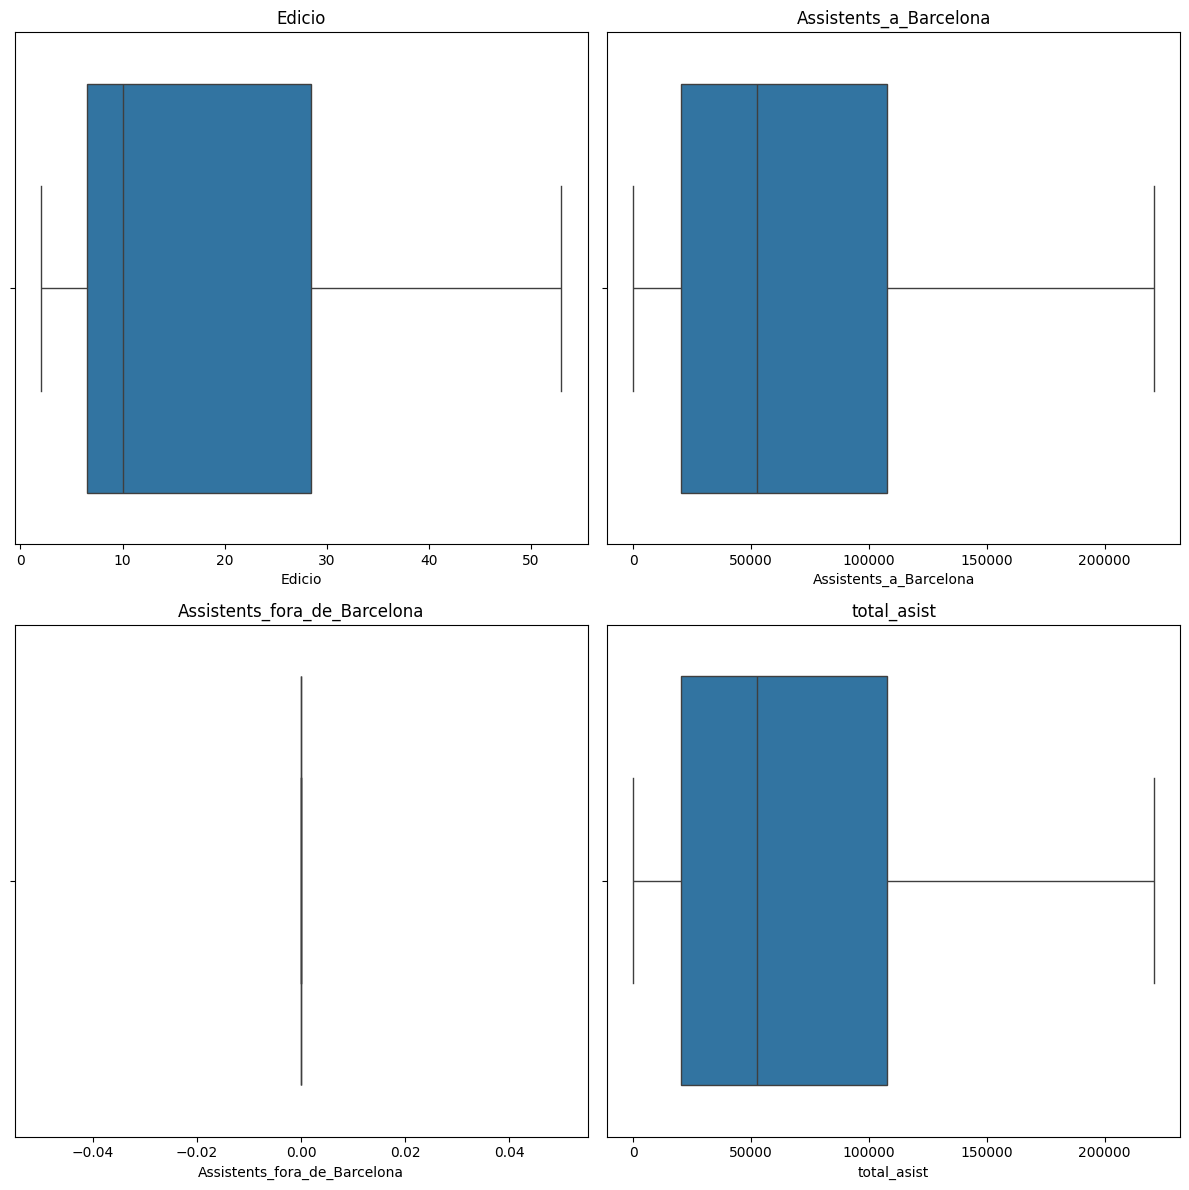

In [92]:
plot_multiple_boxplots(festivales_bcn_21, columnas_numericas_fests)

Comentarios <br>


In [93]:
plot_boxplot_grouped(festivales_bcn_21, "Edicio", "total_asist")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [94]:
festivales_bcn_21.describe().loc[["std", "mean"]].T

,std,mean
Edicio,20.718062,19.285714
Assistents_a_Barcelona,77169.256193,75648.000000
Assistents_fora_de_Barcelona,0.000000,0.000000
total_asist,77169.256193,75648.000000


In [95]:
variabilidad(festivales_bcn_21)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,20.718062,19.285714,1.07427
Assistents_a_Barcelona,77169.256193,75648.000000,1.02011
Assistents_fora_de_Barcelona,0.000000,0.000000,NaN
total_asist,77169.256193,75648.000000,1.02011


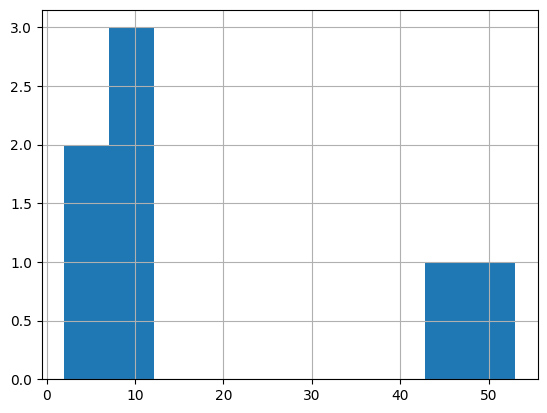

In [96]:
festivales_bcn_21["Edicio"].hist();

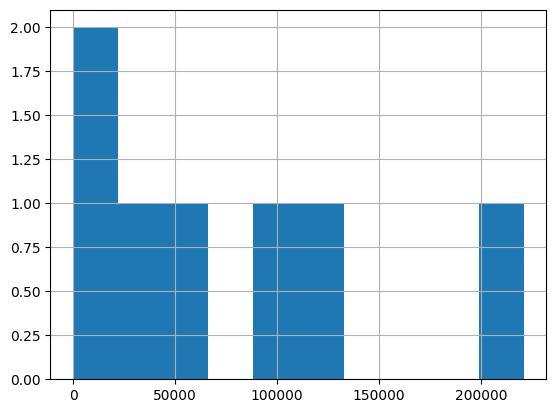

In [97]:
festivales_bcn_21["total_asist"].hist();

Comentarios <br>


Distribución

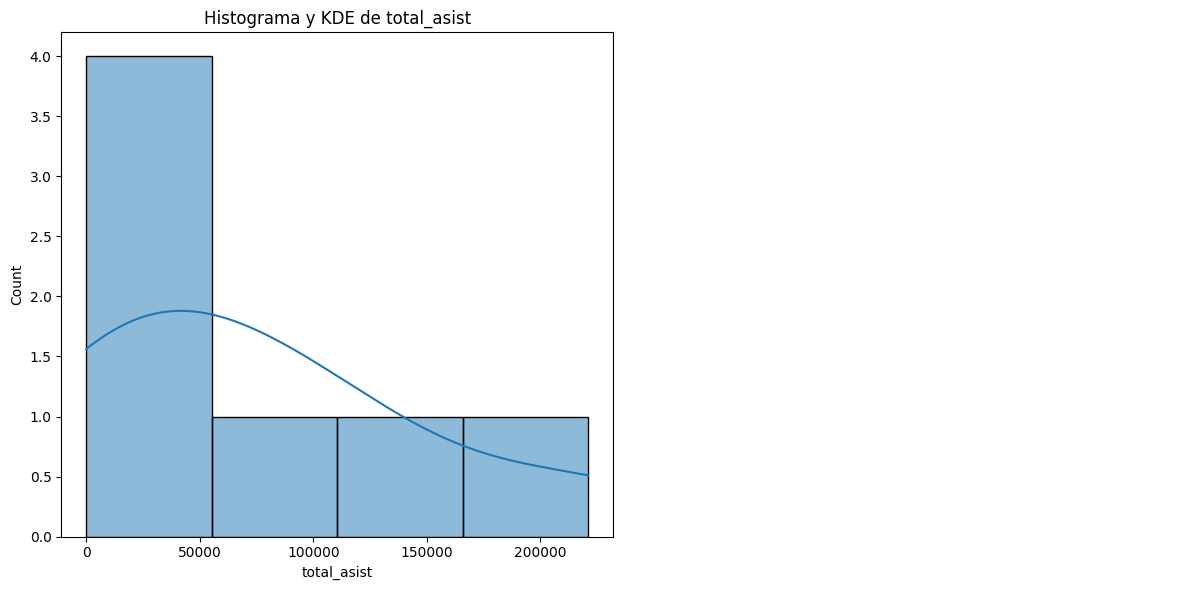

In [98]:
plot_histo_den(festivales_bcn_21, ["total_asist"])

Anomalías outliers

(2,)


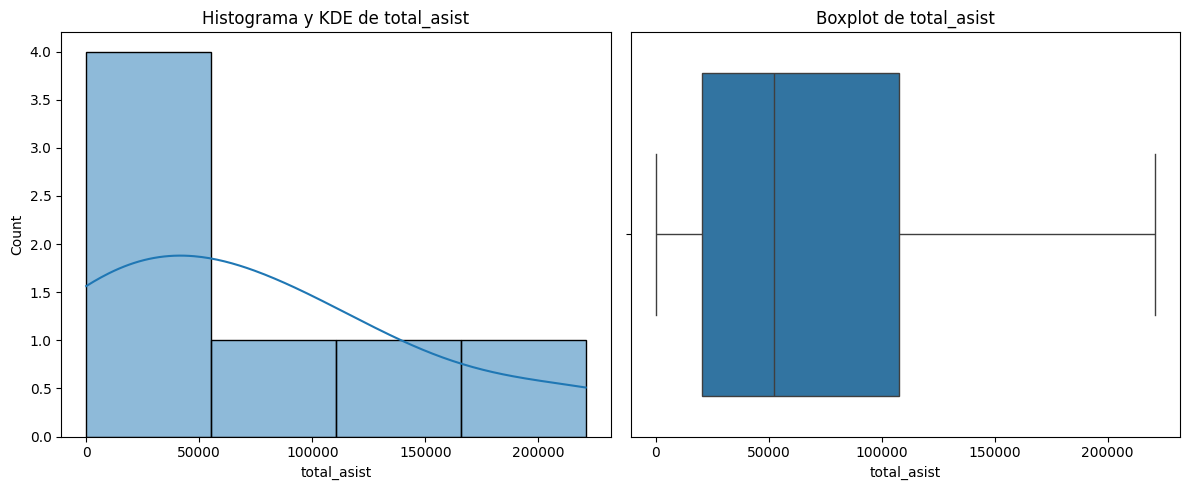

In [99]:
plot_combined_graphs(festivales_bcn_21, ["total_asist"])